In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

df = pd.read_csv('/home/lung cancer survey.csv')
df.head(5)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [13]:
df1 = df.copy()
df1['GENDER'] = df1.apply(lambda row: 1 if row['GENDER'] == 'M' else 0, axis=1)
df1['LUNG_CANCER'] = df1.apply(lambda row: 1 if row['LUNG_CANCER'] == 'YES' else 0, axis=1)
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [16]:
df1.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [17]:
x = df1.drop('LUNG_CANCER', axis='columns')
y = df1['LUNG_CANCER']
x_scaled = preprocessing.StandardScaler().fit(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

# lbfgs, yes
# liblinear,no
# newton-cg,yes
# newton-cholesky,no
# sag,yes
# saga,yes

d = {'lbfgs':0, 'liblinear':0, 'newton-cg':0,  'newton-cholesky':0, 'sag':0, 'saga':0}

for k in d.keys():
  classifier = LogisticRegression(max_iter=100000, solver=k)
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x)
  print(f"Accuracy {k}:", accuracy_score(y, y_pred))
  d[k] = accuracy_score(y, y_pred)

classifier = LogisticRegression(max_iter=100000, solver=max(d, key=d.get))
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x)
print(f"Chosen one ",max(d, key=d.get) ,":", accuracy_score(y, y_pred))
d[k] = accuracy_score(y, y_pred)

Accuracy lbfgs: 0.9288025889967637
Accuracy liblinear: 0.889967637540453
Accuracy newton-cg: 0.9288025889967637
Accuracy newton-cholesky: 0.9288025889967637
Accuracy sag: 0.889967637540453
Accuracy saga: 0.889967637540453
Chosen one  lbfgs : 0.9288025889967637


<Axes: >

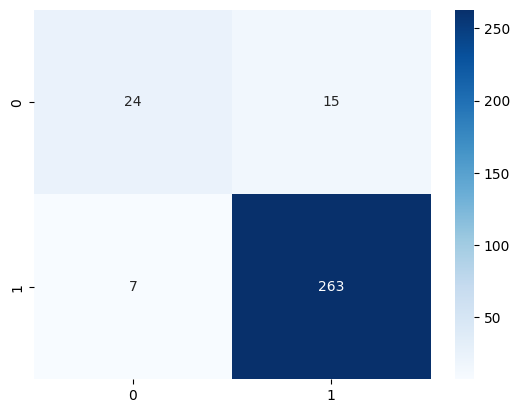

In [18]:
y_pred = classifier.predict(x)
matrix = confusion_matrix(y, y_pred)
# sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues")
# matrix


In [ ]:
classifier.coef_

array([[-1.75010234e-01,  1.47290126e+00,  8.97907743e-02,
        -1.12657369e-02,  1.80051900e-02, -1.12057683e-02,
         6.60436124e-03, -4.36914365e-03,  1.56546486e-01,
        -8.86360128e-01, -9.38099441e-01, -8.62657758e-06],
       [ 3.03518057e-03, -1.83072402e-01, -6.97669902e-01,
        -3.90398694e-02,  1.39784644e-01,  2.14812851e-02,
        -4.90627342e-03,  2.44445148e-03, -4.23086496e-01,
        -4.61733760e-02,  5.66961548e-02,  1.91226270e-04],
       [ 1.71975054e-01, -1.28982886e+00,  6.07879128e-01,
         5.03056063e-02, -1.57789834e-01, -1.02755168e-02,
        -1.69808782e-03,  1.92469217e-03,  2.66540010e-01,
         9.32533504e-01,  8.81403286e-01, -1.82599700e-04]])

In [19]:
from sklearn.feature_selection import chi2
scores, pvalues = chi2(x, y)
result = pd.DataFrame({'X':x.columns, 'pvalues':pvalues})
print(result)

                        X   pvalues
0                  GENDER  0.414836
1                     AGE  0.103453
2                 SMOKING  0.684944
3          YELLOW_FINGERS  0.207741
4                 ANXIETY  0.297993
5           PEER_PRESSURE  0.181270
6         CHRONIC DISEASE  0.426921
7                FATIGUE   0.336820
8                ALLERGY   0.021784
9                WHEEZING  0.081000
10      ALCOHOL CONSUMING  0.043434
11               COUGHING  0.086075
12    SHORTNESS OF BREATH  0.689229
13  SWALLOWING DIFFICULTY  0.060142
14             CHEST PAIN  0.182527
